In [1]:
# Package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import statistics
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Red wine

In [2]:
red_df = pd.read_csv('winequality-red.csv', sep=';')
red_df = red_df.to_numpy()
red_x = red_df[:, 0:11]
red_y = red_df[:, 11]
print(len(red_df))
print(red_df)

1599
[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


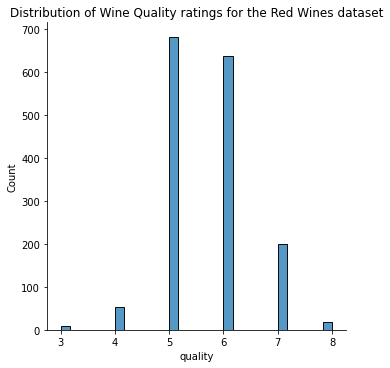

In [3]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
sns.displot(red_wine, x="quality").set(title='Distribution of Wine Quality ratings for the Red Wines dataset')

In [4]:
#Red Wine all predictors 
#saving 20% of data for testing 
red_df = shuffle(red_df,random_state=21)

X_train, X_test, y_train, y_test = train_test_split(red_x, red_y, test_size=0.20, random_state=42)
# restructuring dataset 
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_train.insert(11, "quality", y_train, allow_duplicates=True)
red_df = X_train.to_numpy()
print(len(red_df))
# x_test and y_test are being reserved for validation 
red_test_x = X_test
red_test_y = y_test


1279


In [5]:
# dummy model train error (0.637495942)

mean = y_train.mean()
mean_squared_error(y_train, [mean for i in range(len( X_train))])

# dummy model test error 0.653505859375
mean = y_test.mean()
print(mean_squared_error(y_test, [mean for i in range(len( X_test))]))

0.653505859375


In [6]:
#red wine
# cross validation  
kf = KFold(n_splits=10) # 5 or 10 # hyperparameter 
error = []

for train, test in kf.split(red_df):
    x_train= red_df[:, 0:11]
    y_train = red_df[:, 11]  
    poly = PolynomialFeatures(5) # hyperparameters 1 2 3 5 
    x_transformed = poly.fit_transform(x_train)
   
    # train the model
    red_model = LinearRegression().fit(x_transformed, y_train)
    test_df = red_df[test, :]
    
#     # validate 
    test_df = red_df[test, :]
    x_test= test_df[:, 0:11]
    y_test = test_df[:, 11]
    x_transformed = poly.fit_transform(x_test)
    
    preds = red_model.predict(x_transformed) 

    print(y_test[0:5])
    print(preds[0:5])
    print("-----------------")
    
    #examining error 
    error.append(mean_squared_error(y_test, preds))
print(statistics.mean(error))

[6. 6. 6. 5. 5.]
[5.99968828 6.00000766 5.99763273 4.99733458 5.00021767]
-----------------
[6. 6. 7. 4. 6.]
[5.99997735 6.00025266 6.99913225 4.0001996  5.99725462]
-----------------
[5. 8. 5. 5. 5.]
[5.00249299 8.00021615 5.00049247 4.99990615 4.99664604]
-----------------
[6. 6. 6. 5. 5.]
[5.99969394 5.99959852 5.99965807 5.00087292 4.99964334]
-----------------
[7. 5. 5. 7. 6.]
[6.99382661 5.00505422 4.99895571 7.0000932  6.00237578]
-----------------
[6. 6. 6. 7. 5.]
[5.98632837 5.9952751  5.98424875 7.00012446 4.99756521]
-----------------
[6. 5. 5. 5. 5.]
[5.99780001 5.0025723  5.01326541 5.00039693 4.99920464]
-----------------
[5. 6. 4. 6. 5.]
[4.99548417 6.00085378 4.00020273 5.99977019 4.99906685]
-----------------
[5. 6. 5. 6. 6.]
[5.00110303 6.00198916 5.01004856 5.99955736 5.9935242 ]
-----------------
[7. 6. 5. 5. 6.]
[7.00099387 5.99728137 5.00066242 4.99984168 5.99999473]
-----------------
3.149365425839343e-05


In [7]:
# training with multicolinearity 
kf = KFold(n_splits=10) # 5 or 10 # hyperparameter 

error = []

for train, test in kf.split(red_df):
    clf= Ridge(alpha=0.001)
    clf.fit(x_train,y_train)
    x_train= red_df[:, 0:11]
    y_train = red_df[:, 11]    
    
    # test 
    test_df = red_df[test, :]
    x_test= test_df[:, 0:11]
    y_test = test_df[:, 11]
    
    num_result = clf.predict(x_test)
    print(y_train[0:5])
    print(num_result[0:5])
    print("-----------------")
    
    #examining error 
    error.append(mean_squared_error(y_test, num_result))
print(statistics.mean(error))

[6. 6. 6. 5. 5.]
[5.70581311 6.0498602  5.68544401 5.1079133  4.79759285]
-----------------
[6. 6. 6. 5. 5.]
[5.6665498  5.10455266 6.11996809 5.70151329 5.79278061]
-----------------
[6. 6. 6. 5. 5.]
[5.05690028 5.94732926 5.21977095 4.86679083 5.31167634]
-----------------
[6. 6. 6. 5. 5.]
[5.99917189 6.31435771 5.48659813 5.3084349  4.7884447 ]
-----------------
[6. 6. 6. 5. 5.]
[6.01537662 5.19766711 5.33598627 6.15510814 6.09310626]
-----------------
[6. 6. 6. 5. 5.]
[5.26517275 5.47296208 5.64781134 6.32950464 5.67498992]
-----------------
[6. 6. 6. 5. 5.]
[5.42202892 5.48241358 5.42768439 4.89798791 5.21590719]
-----------------
[6. 6. 6. 5. 5.]
[5.61541124 5.65213582 5.68910437 5.73215079 5.86141233]
-----------------
[6. 6. 6. 5. 5.]
[5.44652233 5.5309132  5.49973274 5.73946906 5.72153314]
-----------------
[6. 6. 6. 5. 5.]
[6.06563599 4.99269185 5.39951204 5.69734649 6.58837645]
-----------------
0.4242006491276194


In [8]:
#Red Wine significant predictors Volitile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, ph, sulfates, alcohol
#saving 20% of data for testing 
red_df = shuffle(red_df,random_state=21)
X_train, X_test, y_train, y_test = train_test_split(red_df[:, 0:11], red_df[:, 11], test_size=0.20, random_state=42)
# restructuring dataset 
X_train = pd.DataFrame(X_train)
X_train = X_train.drop(columns = [0, 2, 3, 7, ])
y_train = pd.DataFrame(y_train)
print(X_train)
X_train.insert(7, "quality", y_train, allow_duplicates=True)
red_df = X_train.to_numpy()

# x_test and y_test are being reserved for validation 
red_test_x = X_test
red_test_y = y_test

         1      4     5     6     8     9     10
0     0.410  0.076  22.0  54.0  3.42  1.16  10.6
1     0.470  0.085   6.0  47.0  3.30  0.68  12.7
2     0.380  0.068  23.0  42.0  3.34  0.72  12.9
3     0.580  0.085  12.0  69.0  3.32  0.70  11.0
4     0.740  0.078  21.0  77.0  3.28  0.51   9.8
...     ...    ...   ...   ...   ...   ...   ...
1018  0.690  0.091  15.0  21.0  3.38  0.60  11.3
1019  0.390  0.082  14.0  67.0  3.34  0.55   9.2
1020  0.645  0.086  14.0  57.0  3.37  0.46  10.3
1021  0.430  0.078  27.0  67.0  3.60  0.59  11.1
1022  0.660  0.083  21.0  59.0  3.37  0.71  11.5

[1023 rows x 7 columns]


In [9]:
# training with multicolinearity 
kf = KFold(n_splits=10) # 5 or 10 # hyperparameter 

error = []

for train, test in kf.split(red_df):
  
    x_train= red_df[:, 0:7]
    y_train = red_df[:, 7]    
    clf= Ridge(alpha=0.001)
    clf.fit(x_train,y_train)
    # test 
    test_df = red_df[test, :]
    x_test= test_df[:, 0:7]
    y_test = test_df[:, 7]
    
    num_result = clf.predict(x_test)
    print(y_train[0:5])
    print(num_result[0:5])
    print("-----------------")
    
    #examining error 
    error.append(mean_squared_error(y_test, num_result))
print(statistics.mean(error))

[6. 6. 7. 6. 5.]
[6.16989824 6.32484507 6.61935497 5.6856527  5.1000364 ]
-----------------
[6. 6. 7. 6. 5.]
[6.21363812 5.23048038 6.43775077 5.42613096 5.19949066]
-----------------
[6. 6. 7. 6. 5.]
[6.95670316 5.15582855 4.88072651 5.42137346 5.71361114]
-----------------
[6. 6. 7. 6. 5.]
[6.77376113 5.22189808 6.50526893 5.32532773 5.85379305]
-----------------
[6. 6. 7. 6. 5.]
[4.98222019 5.04652628 5.34130067 6.18114712 5.73357467]
-----------------
[6. 6. 7. 6. 5.]
[5.68283801 5.72130411 4.74991598 5.98784525 5.33126269]
-----------------
[6. 6. 7. 6. 5.]
[4.99724728 5.13024727 5.52032916 5.76035709 6.22423383]
-----------------
[6. 6. 7. 6. 5.]
[5.81360679 5.27133449 5.51061222 5.76333309 5.96851011]
-----------------
[6. 6. 7. 6. 5.]
[6.13054555 6.54690499 6.18151315 5.63467508 6.393085  ]
-----------------
[6. 6. 7. 6. 5.]
[5.66857851 4.97777561 5.67749643 5.40702236 5.24650975]
-----------------
0.43120982268369223


# White Wine

In [10]:
white_df = pd.read_csv('winequality-white.csv', sep=';')
white_df = white_df.to_numpy()
white_x = white_df[:, 0:11]
white_y = white_df[:, 11]

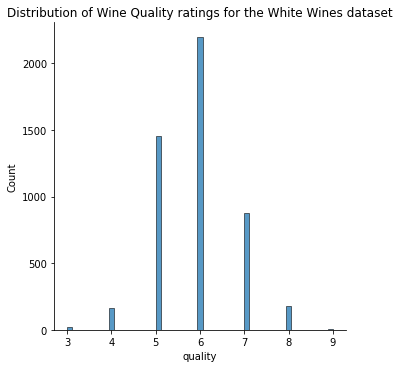

In [11]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
sns.displot(white_wine, x="quality").set(title='Distribution of Wine Quality ratings for the White Wines dataset')

## Pre Processing and testing 

In [12]:
#saving 20% of data for testing 
white_df = shuffle(white_df,random_state=21)

X_train, X_test, y_train, y_test = train_test_split(white_df[:, 0:11], white_df[:, 11], test_size=0.20, random_state=42)
# restructuring dataset 
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_train.insert(11, "quality", y_train, allow_duplicates=True)
white_df = X_train.to_numpy()

# x_test and y_test are being reserved for validation 
white_test_x = X_test
white_test_y = y_test

In [13]:
# dummy model train error of (0.78331)

mean = y_train.mean()

mean_squared_error(y_train, [mean for i in range(len( X_train))])

# dummy model test error of (0.7797)

mean = y_train.mean()

mean_squared_error(y_test, [mean for i in range(len( X_test))])

0.8047107330745643

In [14]:
#white wine
# cross validation  
kf = KFold(n_splits=10) # 5 or 10 # hyperparameter 
error = []

for train, test in kf.split(white_df):
    x_train= white_df[:, 0:7]
    y_train = white_df[:, 7]  
    poly = PolynomialFeatures(5) # hyperparameters 1 2 3 5 
    x_transformed = poly.fit_transform(x_train)
   
    # train the model
    white_model = LinearRegression().fit(x_transformed, y_train)
    test_df = white_df[test, :]  
    # validate 
    test_df = white_df[test, :]
    x_test= test_df[:, 0:7]
    y_test = test_df[:, 7]
    x_transformed = poly.fit_transform(x_test)
    
    preds = white_model.predict(x_transformed) 

    print(y_test[0:5])
    print(preds[0:5])
    print("-----------------")
    
    #examining error 
    error.append(mean_squared_error(y_test, preds))
print(statistics.mean(error))

[0.9918  0.998   0.99519 0.9948  0.99326]
[0.99160261 0.99807399 0.99479628 0.99242297 0.99502066]
-----------------
[0.9898  0.99144 0.995   0.9955  0.9942 ]
[0.99052565 0.99147858 0.99432359 0.99584048 0.99298951]
-----------------
[0.9981  0.997   0.99094 0.99172 0.9893 ]
[0.99893196 0.99811338 0.99079295 0.99240446 0.98866073]
-----------------
[0.9947 0.9934 0.9911 0.9914 1.0004]
[0.99562742 0.99329921 0.99164612 0.99324632 0.99950647]
-----------------
[1.      0.9928  0.99188 0.99712 0.99863]
[0.99966474 0.9933568  0.99224756 0.99542141 0.99934805]
-----------------
[0.99709 0.99142 0.98944 0.9976  0.9993 ]
[0.99813171 0.99174321 0.99117072 0.9978041  0.99895709]
-----------------
[0.9975  0.99269 0.9984  0.99121 0.99144]
[0.99650605 0.99262803 0.99839923 0.98997089 0.99061972]
-----------------
[0.99517 0.9954  0.992   0.99838 0.99126]
[0.99525746 0.99624751 0.99091352 0.997847   0.99104494]
-----------------
[0.995   0.9906  0.99908 0.9934  0.9965 ]
[0.99426074 0.99013258 1.00

In [15]:
# training with multicolinearity 
kf = KFold(n_splits=10) # 5 or 10 # hyperparameter 

error = []

for train, test in kf.split(white_df):
    x_train= white_df[:, 0:11]
    y_train = white_df[:, 11]  
    clf= Ridge(alpha=0.001)
    clf.fit(x_train,y_train)
      
    
    # test 
    test_df = white_df[test, :]
    x_test= test_df[:, 0:11]
    y_test = test_df[:, 11]
    
    num_result = clf.predict(x_test)
    print(y_train[0:5])
    print(num_result[0:5])
    print("-----------------")
    
    #examining error 
    error.append(mean_squared_error(y_test, num_result))
print(statistics.mean(error))

[6. 5. 5. 7. 7.]
[6.18520553 5.51801422 5.43047721 5.95753931 6.15179028]
-----------------
[6. 5. 5. 7. 7.]
[6.57697041 6.23688545 6.04693535 5.62985489 5.58821935]
-----------------
[6. 5. 5. 7. 7.]
[6.01142406 6.02905288 6.28251846 6.51165198 6.4396777 ]
-----------------
[6. 5. 5. 7. 7.]
[6.24638922 5.97208784 6.33590691 5.96382016 5.65478521]
-----------------
[6. 5. 5. 7. 7.]
[5.65516732 6.2148094  6.22029382 5.17993808 5.96018501]
-----------------
[6. 5. 5. 7. 7.]
[5.84245757 6.04240163 6.83319294 5.22781381 5.87824984]
-----------------
[6. 5. 5. 7. 7.]
[6.06717588 5.94208459 5.59075177 6.16070592 5.80406488]
-----------------
[6. 5. 5. 7. 7.]
[5.58800192 5.89946487 6.34282892 5.30114891 5.80354687]
-----------------
[6. 5. 5. 7. 7.]
[5.93592709 5.97386568 5.47135006 6.07565544 5.27197771]
-----------------
[6. 5. 5. 7. 7.]
[5.9254151  6.23888341 5.59703319 5.58908879 6.39996687]
-----------------
0.5616921800528739


In [16]:
#White Wine significant predictors Fixed acidity, volatile acidity, residual sugar, free sulfur dioxide, density, ph , sulfates, alcohol 
#saving 20% of data for testing 
white_df = shuffle(white_df,random_state=21)
X_train, X_test, y_train, y_test = train_test_split(white_df[:, 0:11], white_df[:, 11], test_size=0.20, random_state=42)
# restructuring dataset 
X_train = pd.DataFrame(X_train)
X_train = X_train.drop(columns = [2, 4, 6])
y_train = pd.DataFrame(y_train)
print(X_train)
X_train.insert(7, "quality", y_train, allow_duplicates=True)
white_df = X_train.to_numpy()

# x_test and y_test are being reserved for validation 
white_test_x = X_test
white_test_y = y_test

        0      1     3     5        7     8     9     10
0     6.50  0.315   6.6   9.0  0.99494  2.94  0.51   8.8
1     6.50  0.350  12.4  86.0  0.99620  3.16  0.51   9.9
2     6.60  0.210   9.9  64.0  0.99500  3.07  0.50  10.1
3     7.00  0.550   8.0  19.0  0.99269  3.26  0.46  12.2
4     6.40  0.300   5.5  62.0  0.99420  3.08  0.45   9.1
...    ...    ...   ...   ...      ...   ...   ...   ...
3129  6.50  0.250  17.4  29.0  0.99776  3.20  0.49  10.1
3130  6.80  0.280   1.4  15.0  0.99180  3.27  0.72  11.7
3131  7.15  0.170   9.6  56.0  0.99578  3.15  0.44  10.2
3132  6.40  0.270   2.0  21.0  0.99516  3.49  0.63   9.6
3133  6.90  0.260   4.2  33.0  0.99020  3.16  0.31  12.5

[3134 rows x 8 columns]


In [17]:
#white wine
# cross validation  
kf = KFold(n_splits=10) # 5 or 10 # hyperparameter 
error = []

for train, test in kf.split(white_df):
    x_train= white_df[:, 0:7]
    y_train = white_df[:, 7]  
    poly = PolynomialFeatures(5) # hyperparameters 1 2 3 5 
    x_transformed = poly.fit_transform(x_train)
   
    # train the model
    white_model = LinearRegression().fit(x_transformed, y_train)
    test_df = white_df[test, :]  
    # validate 
    test_df = white_df[test, :]
    x_test= test_df[:, 0:7]
    y_test = test_df[:, 7]
    x_transformed = poly.fit_transform(x_test)
    
    preds = white_model.predict(x_transformed) 

    print(y_test[0:5])
    print(preds[0:5])
    print("-----------------")
    
    #examining error 
    error.append(mean_squared_error(y_test, preds))
print(statistics.mean(error))

[5. 6. 6. 6. 6.]
[4.49098454 5.65837632 6.18482016 6.77283751 5.48296691]
-----------------
[7. 7. 5. 6. 7.]
[7.58376052 7.02560021 5.24533146 6.51097246 5.79408787]
-----------------
[7. 5. 7. 6. 6.]
[7.28493797 6.26063136 5.93459089 5.14324903 5.89285549]
-----------------
[6. 6. 6. 6. 8.]
[5.95443877 6.32218718 5.88221977 6.5494511  7.65097918]
-----------------
[6. 6. 8. 4. 6.]
[5.89549973 5.79402648 6.90073102 5.81607431 5.15090246]
-----------------
[7. 5. 5. 5. 6.]
[6.41731136 5.48436707 5.29850729 5.58394064 5.88320813]
-----------------
[5. 6. 6. 6. 6.]
[5.30944335 5.53448934 6.24886857 5.74320023 6.14579289]
-----------------
[5. 6. 7. 6. 7.]
[6.08283143 5.69104903 6.27137378 5.22993719 6.46549397]
-----------------
[6. 6. 6. 3. 6.]
[5.51389298 6.16253753 5.70805372 4.53473806 6.2136933 ]
-----------------
[5. 5. 4. 5. 6.]
[5.77633082 5.48969505 4.6330505  5.90029947 5.55415476]
-----------------
0.37473431197304
